In [90]:
import pandas as pd
import numpy as np

---
## **Pandas DataType**

- Series - like array, it has a list of data for a column 
- DataFrame - like table, collection of columns (key-array pair)
- Anatony of DataFrame

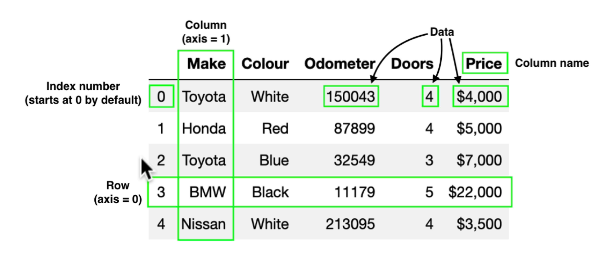

In [91]:
# This is for series
car_brand = pd.Series(["BMW", "Toyota", "Honda"])
car_color = pd.Series(["Red", "Blue", "White"])
print(car_brand)
print("-----------------")
print(car_color)

0       BMW
1    Toyota
2     Honda
dtype: object
-----------------
0      Red
1     Blue
2    White
dtype: object


In [92]:
# This is for dataframe
car_data = pd.DataFrame({"Brand": car_brand, "Color": car_color})
print(car_data)

    Brand  Color
0     BMW    Red
1  Toyota   Blue
2   Honda  White


---
## **Import and Export Data**

- Import - pd.read_csv( <filename> ) or .read_excel()
- Export - <dataframe_varaible>.to_csv(<filename>) or .to_excel()

In [93]:
#Import
car_sales = pd.read_csv("car-sales.csv")
print(car_sales)

#Export
# Note: Normally pandas will additional index column at the beginning 
car_sales.to_csv("export_sales_data_test.csv", index=False)


     Make Colour  Odometer (KM)  Doors       Price
0  Toyota  White         150043      4   $4,000.00
1   Honda    Red          87899      4   $5,000.00
2  Toyota   Blue          32549      3   $7,000.00
3     BMW  Black          11179      5  $22,000.00
4  Nissan  White         213095      4   $3,500.00
5  Toyota  Green          99213      4   $4,500.00
6   Honda   Blue          45698      4   $7,500.00
7   Honda   Blue          54738      4   $7,000.00
8  Toyota  White          60000      4   $6,250.00
9  Nissan  White          31600      4   $9,700.00


In [94]:
# Checking exported car sales
exported_car_sales = pd.read_csv("export_sales_data_test.csv")
print(car_sales)

     Make Colour  Odometer (KM)  Doors       Price
0  Toyota  White         150043      4   $4,000.00
1   Honda    Red          87899      4   $5,000.00
2  Toyota   Blue          32549      3   $7,000.00
3     BMW  Black          11179      5  $22,000.00
4  Nissan  White         213095      4   $3,500.00
5  Toyota  Green          99213      4   $4,500.00
6   Honda   Blue          45698      4   $7,500.00
7   Honda   Blue          54738      4   $7,000.00
8  Toyota  White          60000      4   $6,250.00
9  Nissan  White          31600      4   $9,700.00


---
## **How to get info about the data**

Attribute
- dtypes - descript each column is store what datatype
- columns - gives us the column names

Methods
- describe() - give some statistic about the dataframe (Note: Only compute for numeric coloumns)
- info() 
- mean() - get the average of the numerical columns
- sum() - sum up all the colunm to get the total value (apparently it also sum string)

Utility function | util_func(<dataframe>)
- len()

In [95]:
print(car_sales.dtypes)
print("---------------------")
df_columns = car_sales.columns
print(df_columns)


Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object
---------------------
Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')


In [96]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [97]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [98]:
get_mean = pd.Series([1,3,5,10])
print(get_mean.mean())
print("------------------------")
print(car_sales.sum())
print("------------------------")
# Get the sum of a single column
print(car_sales["Odometer (KM)"].sum())
print("------------------------")
print(f"The car sales have {len(car_sales)} rows")

4.75
------------------------
Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object
------------------------
786014
------------------------
The car sales have 10 rows


---
## **View and Select Data**

Method
- head() - no param = view to first 5 top data, put param, n = view n number of top data
- tail() - same as head() view bottom


Brackt access row [number]
- loc[n] - get all the rows with index value = matching n (can have multiple if use custom index)  
- iloc[n] - get the specific row @ location n instead of index value (single value)
- ["<column_name>"] 
or 
.<column_name>  - select specific column 

### Bonus: Create Own Custom Index
`
animal = pd.Series(["cat", "dog", "bird", "panda", "snake"], index=[0, 3, 8, 8, 9])
`

In [99]:
print(car_sales.head())
print("--------------------")
print(car_sales.tail())
print("--------------------")
print(car_sales.head(1))
print("--------------------")
print(car_sales.tail(1))

     Make Colour  Odometer (KM)  Doors       Price
0  Toyota  White         150043      4   $4,000.00
1   Honda    Red          87899      4   $5,000.00
2  Toyota   Blue          32549      3   $7,000.00
3     BMW  Black          11179      5  $22,000.00
4  Nissan  White         213095      4   $3,500.00
--------------------
     Make Colour  Odometer (KM)  Doors      Price
5  Toyota  Green          99213      4  $4,500.00
6   Honda   Blue          45698      4  $7,500.00
7   Honda   Blue          54738      4  $7,000.00
8  Toyota  White          60000      4  $6,250.00
9  Nissan  White          31600      4  $9,700.00
--------------------
     Make Colour  Odometer (KM)  Doors      Price
0  Toyota  White         150043      4  $4,000.00
--------------------
     Make Colour  Odometer (KM)  Doors      Price
9  Nissan  White          31600      4  $9,700.00


In [100]:
animal = pd.Series(["cat", "dog", "bird", "panda", "snake"], index=[14, 3, 8, 8, 9])
# Use loc
print(animal.loc[8])
print("----------------------")
# Use iloc
print(animal.iloc[1])

8     bird
8    panda
dtype: object
----------------------
dog


---
## **Slicing data**

[: :]

[4:7] - Get row 4 till 6 (step is 1)
[2:8:2] - Get from row 2 till 7 (but skip 1 row everytime)
[::] - No slicing
[:3] - Start from 0 if blank
[3:] - End from the last if blank

In [104]:
print(car_sales.iloc[4:7])
print("-----------------")
print(car_sales.iloc[2:8:2])
print("-----------------")
print(car_sales.iloc[: :])
print("-----------------")
print(car_sales.iloc[:3])
print("-----------------")
print(car_sales.iloc[3:])
print("-----------------")

     Make Colour  Odometer (KM)  Doors      Price
4  Nissan  White         213095      4  $3,500.00
5  Toyota  Green          99213      4  $4,500.00
6   Honda   Blue          45698      4  $7,500.00
-----------------
     Make Colour  Odometer (KM)  Doors      Price
2  Toyota   Blue          32549      3  $7,000.00
4  Nissan  White         213095      4  $3,500.00
6   Honda   Blue          45698      4  $7,500.00
-----------------
     Make Colour  Odometer (KM)  Doors       Price
0  Toyota  White         150043      4   $4,000.00
1   Honda    Red          87899      4   $5,000.00
2  Toyota   Blue          32549      3   $7,000.00
3     BMW  Black          11179      5  $22,000.00
4  Nissan  White         213095      4   $3,500.00
5  Toyota  Green          99213      4   $4,500.00
6   Honda   Blue          45698      4   $7,500.00
7   Honda   Blue          54738      4   $7,000.00
8  Toyota  White          60000      4   $6,250.00
9  Nissan  White          31600      4   $9,700.00
---

---
## **Data Filtering**
                           <! --- Condition --- > 
`df[df[column_name] == "Only show row with the label]"`

`df[fd[column_name] > 1000]`

In [105]:
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [110]:
car_sales[car_sales["Odometer (KM)"] < 80000]

,Make,Colour,Odometer (KM),Doors,Price
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


---
## **Comparing 2 columns**



In [111]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


---
## **Group data with the same lable**

In [118]:
# This code groups all same manufacturer and calculates the mean for each
car_sales.groupby(["Make"])["Doors"].mean()

Make
BMW       5.00
Honda     4.00
Nissan    4.00
Toyota    3.75
Name: Doors, dtype: float64

---
## **Add Visualization (jumping topic 🤪)**

- plot() 📈
- hist() 📊

<Axes: >

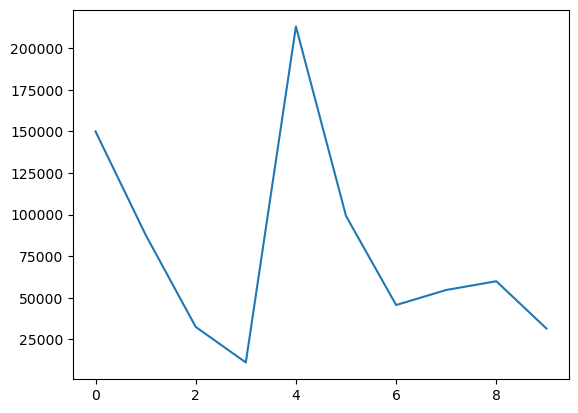

In [117]:
car_sales["Odometer (KM)"].plot()

<Axes: >

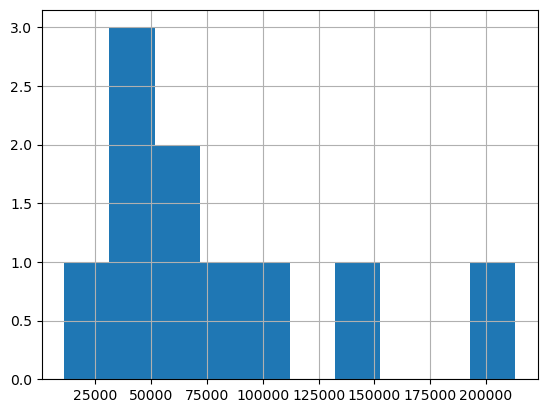

In [119]:
car_sales["Odometer (KM)"].hist()

---

## **Manipulating Data**

Change price (Have $ and .) to numeric
`car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)`
- Note: removing unwanted characters

# ---

Method
- fillna() - Fill in missing values
- dropna() - 

# ---

**!! Important !!**

`missing_data["Odometer"] = missing_data["Odometer"].fillna(`

- When perform manipulation on data, need to reassign for it to take effect

or can use inplace

.fillna(car sales ssing[ "Odometer" ] . mean( ) , inplace=True )

In [157]:
car_sales["Price"] = car_sales["Price"].astype(str).str.replace('[\$,]', '', regex=True).astype(float).astype(int)
print(car_sales)

     Make Colour  Odometer (KM)  Doors    Price  Total fuel used
0  Toyota  White         150043      4   400000         1650.473
1   Honda    Red          87899      4   500000         1933.778
2  Toyota   Blue          32549      3   700000         1074.117
3     BMW  Black          11179      5  2200000          491.876
4  Nissan  White         213095      4   350000        11720.225
5  Toyota  Green          99213      4   450000         6548.058
6   Honda   Blue          45698      4   750000         3518.746
7   Honda   Blue          54738      4   700000         4816.944
8  Toyota  White          60000      4   625000         5940.000
9  Nissan  White          31600      4   970000         3191.600


In [158]:
missing_data = pd.read_csv("car-sales-missing-data.csv")
print(missing_data)
print("---------------------")
print(missing_data .fillna("Hello world"))
print("---------------------")
missing_data["Odometer"] = missing_data["Odometer"].fillna(missing_data["Odometer"].mean())
print(missing_data)

---
## **Adding new column**

- Add series to a existing dataframe (similar like add new key-value pair)
- Add new column based on computation of existing column
- Add new column using lambda function

In [159]:
print(car_sales)
print("---------------------------------")
fuel_economy = pd.Series([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.1])
car_sales["Fuel per 100KM"] = fuel_economy
print(car_sales)


In [160]:
car_sales["Total fuel used"] = car_sales["Odometer (KM)"] / 100 * car_sales["Fuel per 100KM"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total fuel used,Fuel per 100KM
0,Toyota,White,150043,4,400000,1650.473,1.1
1,Honda,Red,87899,4,500000,1933.778,2.2
2,Toyota,Blue,32549,3,700000,1074.117,3.3
3,BMW,Black,11179,5,2200000,491.876,4.4
4,Nissan,White,213095,4,350000,11720.225,5.5
5,Toyota,Green,99213,4,450000,6548.058,6.6
6,Honda,Blue,45698,4,750000,3518.746,7.7
7,Honda,Blue,54738,4,700000,4816.944,8.8
8,Toyota,White,60000,4,625000,5940.000,9.9
9,Nissan,White,31600,4,970000,3191.600,10.1


In [170]:
car_sales["Odometer (Miles)"] =  car_sales["Odometer (KM)"].apply(lambda x: x / 1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total fuel used,Odometer (Miles)
0,Toyota,White,60000,4,625000,5940.000,37500.000
1,Toyota,Green,99213,4,450000,6548.058,62008.125
2,Nissan,White,31600,4,970000,3191.600,19750.000
3,Nissan,White,213095,4,350000,11720.225,133184.375
4,Honda,Red,87899,4,500000,1933.778,54936.875
5,Honda,Blue,45698,4,750000,3518.746,28561.250
6,Toyota,White,150043,4,400000,1650.473,93776.875
7,BMW,Black,11179,5,2200000,491.876,6986.875
8,Toyota,Blue,32549,3,700000,1074.117,20343.125
9,Honda,Blue,54738,4,700000,4816.944,34211.250


---
## **Deleting Stuff**

- drop(<column name>, axis=<column index>) - remove column

In [161]:
car_sales.drop("Fuel per 100KM", axis=1, inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total fuel used
0,Toyota,White,150043,4,400000,1650.473
1,Honda,Red,87899,4,500000,1933.778
2,Toyota,Blue,32549,3,700000,1074.117
3,BMW,Black,11179,5,2200000,491.876
4,Nissan,White,213095,4,350000,11720.225
5,Toyota,Green,99213,4,450000,6548.058
6,Honda,Blue,45698,4,750000,3518.746
7,Honda,Blue,54738,4,700000,4816.944
8,Toyota,White,60000,4,625000,5940.000
9,Nissan,White,31600,4,970000,3191.600


---
## Preparation of data

- sample(frac=1) - data shuffling, where frac ~ percentage of data to sample range 0 - 1
- reset_index() - to undo the shuffling

In [166]:
car_sales = car_sales.sample(frac=1)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total fuel used
8,Toyota,White,60000,4,625000,5940.000
5,Toyota,Green,99213,4,450000,6548.058
9,Nissan,White,31600,4,970000,3191.600
4,Nissan,White,213095,4,350000,11720.225
1,Honda,Red,87899,4,500000,1933.778
6,Honda,Blue,45698,4,750000,3518.746
0,Toyota,White,150043,4,400000,1650.473
3,BMW,Black,11179,5,2200000,491.876
2,Toyota,Blue,32549,3,700000,1074.117
7,Honda,Blue,54738,4,700000,4816.944


In [167]:
car_sales.sample(frac=0.2)

,Make,Colour,Odometer (KM),Doors,Price,Total fuel used
1,Honda,Red,87899,4,500000,1933.778
0,Toyota,White,150043,4,400000,1650.473


In [169]:
car_sales.reset_index(drop=True, inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total fuel used
0,Toyota,White,60000,4,625000,5940.000
1,Toyota,Green,99213,4,450000,6548.058
2,Nissan,White,31600,4,970000,3191.600
3,Nissan,White,213095,4,350000,11720.225
4,Honda,Red,87899,4,500000,1933.778
5,Honda,Blue,45698,4,750000,3518.746
6,Toyota,White,150043,4,400000,1650.473
7,BMW,Black,11179,5,2200000,491.876
8,Toyota,Blue,32549,3,700000,1074.117
9,Honda,Blue,54738,4,700000,4816.944
